#### Michael Perrine
#### Data Visualization
#### Professor Schneider
#### DSC 640

<h1><center> Netflix Data Visulization </center></h1>

The first step is to import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import warnings


In [3]:
warnings.filterwarnings('ignore')

The next step is to upload the necessary datasets for the analysis.

In [4]:
country =pd.DataFrame(pd.read_excel('all-weeks-countries-netflix.xlsx') )
country.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-04-14,Films,1,The Tearsmith,NaN,2
1,Argentina,AR,2024-04-14,Films,2,Stolen,NaN,1
2,Argentina,AR,2024-04-14,Films,3,"Love, Divided",NaN,1
3,Argentina,AR,2024-04-14,Films,4,Woody Woodpecker Goes to Camp,NaN,1
4,Argentina,AR,2024-04-14,Films,5,Rest In Peace,NaN,3


In [5]:
country = country.dropna(axis=1)

In [6]:
country.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-04-14,Films,1,The Tearsmith,2
1,Argentina,AR,2024-04-14,Films,2,Stolen,1
2,Argentina,AR,2024-04-14,Films,3,"Love, Divided",1
3,Argentina,AR,2024-04-14,Films,4,Woody Woodpecker Goes to Camp,1
4,Argentina,AR,2024-04-14,Films,5,Rest In Peace,3


In [7]:
uniqueCountries = country['country_name'].nunique()
print("The number of unique countries are: ", uniqueCountries)

The number of unique countries are:  94


In [12]:
country.isnull().sum()

country_name                  0
country_iso2                  0
week                          0
category                      0
weekly_rank                   0
show_title                    0
cumulative_weeks_in_top_10    0
dtype: int64

In [8]:
country.dtypes

country_name                  object
country_iso2                  object
week                          object
category                      object
weekly_rank                    int64
show_title                    object
cumulative_weeks_in_top_10     int64
dtype: object

In [9]:
country.shape

(272260, 7)

In [15]:

country_df = country.set_index('week')

In [16]:
country_df

,country_name,country_iso2,category,weekly_rank,show_title,cumulative_weeks_in_top_10
week,,,,,,
2024-04-14,Argentina,AR,Films,1,The Tearsmith,2
2024-04-14,Argentina,AR,Films,2,Stolen,1
2024-04-14,Argentina,AR,Films,3,"Love, Divided",1
2024-04-14,Argentina,AR,Films,4,Woody Woodpecker Goes to Camp,1
2024-04-14,Argentina,AR,Films,5,Rest In Peace,3
...,...,...,...,...,...,...
2021-07-04,Vietnam,VN,TV,6,Reply 1988,1
2021-07-04,Vietnam,VN,TV,7,"Nevertheless,",1
2021-07-04,Vietnam,VN,TV,8,Too Hot to Handle,1


<Axes: xlabel='cumulative_weeks_in_top_10', ylabel='Count'>

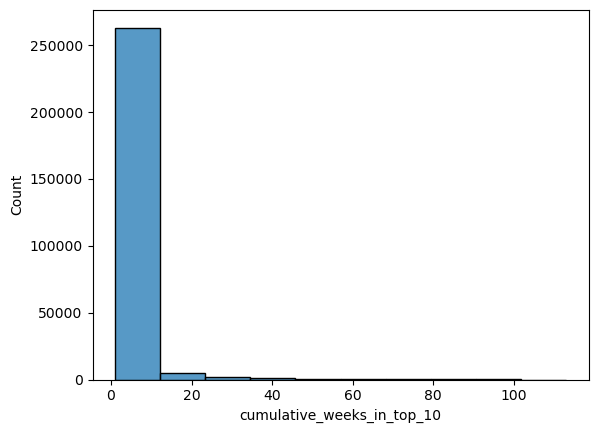

In [21]:
sns.histplot(data=country_df, x='cumulative_weeks_in_top_10', bins = 10)

In [ ]:
world = pd.DataFrame(pd.read_excel('all-weeks-global-netflix.xlsx'))
world.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-04-14,Films (English),1,What Jennifer Did,NaN,26100000,1.4500,18000000.0,1,False,NaN
1,2024-04-14,Films (English),2,Woody Woodpecker Goes to Camp,NaN,19600000,1.6667,11800000.0,1,False,NaN
2,2024-04-14,Films (English),3,Scoop,NaN,14600000,1.7167,8500000.0,2,False,NaN
3,2024-04-14,Films (English),4,Glass,NaN,11000000,2.1500,5100000.0,2,False,NaN
4,2024-04-14,Films (English),5,Megan Leavey,NaN,9700000,1.9333,5000000.0,1,False,NaN


In [ ]:
world = world.dropna(axis=1)

In [ ]:
world.head()

,week,category,weekly_rank,show_title,weekly_hours_viewed,cumulative_weeks_in_top_10,is_staggered_launch
0,2024-04-14,Films (English),1,What Jennifer Did,26100000,1,False
1,2024-04-14,Films (English),2,Woody Woodpecker Goes to Camp,19600000,1,False
2,2024-04-14,Films (English),3,Scoop,14600000,2,False
3,2024-04-14,Films (English),4,Glass,11000000,2,False
4,2024-04-14,Films (English),5,Megan Leavey,9700000,1,False


In [ ]:
world.dtypes


week                          object
category                      object
weekly_rank                    int64
show_title                    object
weekly_hours_viewed            int64
cumulative_weeks_in_top_10     int64
is_staggered_launch             bool
dtype: object

In [ ]:
world.shape

(5840, 7)

In [ ]:
world.nunique().sum()

np.int64(4820)

In [ ]:
most_pop = pd.DataFrame(pd.read_excel('most-popular-netflix.xlsx'))
most_pop.head()

,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days
0,Films (English),1,Red Notice,NaN,454200000,1.9667,230900000
1,Films (English),2,Don't Look Up,NaN,408600000,2.3833,171400000
2,Films (English),3,The Adam Project,NaN,281000000,1.7833,157600000
3,Films (English),4,Bird Box,NaN,325300000,2.0667,157400000
4,Films (English),5,Leave the World Behind,NaN,339300000,2.3667,143400000


In [ ]:
most_pop = most_pop.dropna(axis=1)

In [ ]:
most_pop.dtypes

category                       object
rank                            int64
show_title                     object
hours_viewed_first_91_days      int64
runtime                       float64
views_first_91_days             int64
dtype: object

In [ ]:
most_pop.shape

(40, 6)

In [ ]:
most_pop.nunique().sum()

np.int64(165)